In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"cancer.csv", header = 0)
data.drop_duplicates(inplace = True)

In [3]:
class KNN:
    def __init__(self , k):
        self.k = k
    def fit(self,X,y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
    def predict(self,X,weight=True):
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x - self.X) ** 2,axis = 1))
            index = dis.argsort()
            index = index[:self.k]
            if weight:
                count = np.bincount(self.y[index],weights = 1 / dis[index])
            else:
                count = np.bincount(self.y[index])
            result.append(count.argmax())
        return np.asarray(result)

In [4]:
data.sample()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
34,16.13,17.88,107.0,807.2,0.104,0.1559,0.1354,0.07752,0.1998,0.06515,...,27.26,132.7,1261.0,0.1446,0.5804,0.5274,0.1864,0.427,0.1233,0


In [5]:
class TRAIN:
    def __init__(self,t):
        self.t = t
    def setTrain(self,data):
        result = data[data["type"] ==  self.t]
        result = result.sample(len(result),random_state=0)
        return result


In [6]:
t0 = TRAIN(t = 0).setTrain(data)
t1 = TRAIN(t = 1).setTrain(data)

haven = 190
train_X = pd.concat([t0.iloc[:haven,:-1],t1.iloc[:haven,:-1]],axis = 0)
train_y = pd.concat([t0.iloc[:haven,-1],t1.iloc[:haven,-1]],axis = 0)

test_X = pd.concat([t0.iloc[haven:,:-1],t1.iloc[haven:,:-1]],axis = 0)
test_y = pd.concat([t0.iloc[haven:,-1],t1.iloc[haven:,-1]],axis = 0)

knn = KNN(k = 3)
knn.fit(train_X,train_y)
# 进行测试，获得测试结果
result = knn.predict(test_X)
result1 = knn.predict(test_X,weight=False)

display(np.sum(result == test_y))
display(np.sum(result1 == test_y))

181

180

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#from matplotlib.font_manager import * 
#myfont = FontProperties(fname='/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/wqy-microhei.ttf')  
# 默认情况下 matplotlib 不支持中文显示，设置任意支持中文的字体即可
mpl.rcParams['font.sans-serif'] = 'WenQuanYi Micro Hei'

# 设置中文字体中正常显示负号（-）。即不适用 unicode 中的 “-” 展示
mpl.rcParams["axes.unicode_minus"] = False

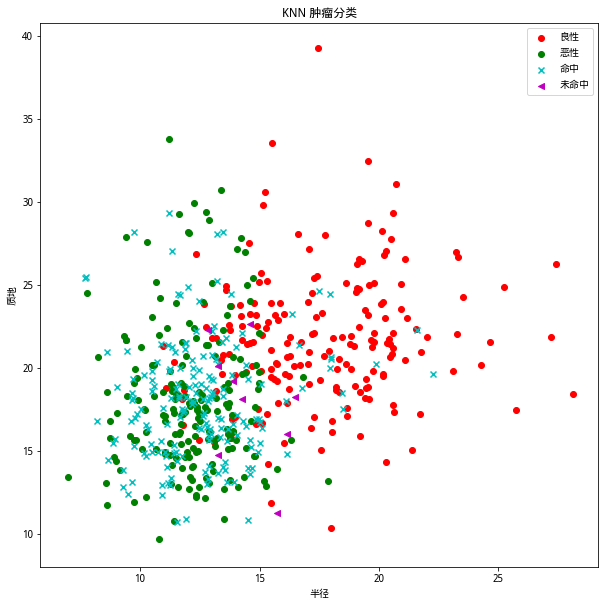

In [8]:
# "setosa":0,"virginica":1,"versicolor":2 
# 设置画布大小
plt.figure(figsize=(10,10))
# 绘制训练集中的数据
plt.scatter(x = t0["mean radius"][:haven],y = t0["mean texture"][:haven],color = "r" , label = "良性")
plt.scatter(x = t1["mean radius"][:haven],y = t1["mean texture"][:haven],color = "g" , label = "恶性")

# 绘制测试集中的数据
# 获取所有预测正确的值
right = test_X[result1 == test_y]
# 获取所有预测错误的值
wrong = test_X[result1 != test_y]
plt.scatter(x = right["mean radius"],y = right["mean texture"],color = "c" ,marker = "x",label = "命中")
plt.scatter(x = wrong["mean radius"],y = wrong["mean texture"],color = "m" ,marker = "<",label = "未命中")
# 设置坐标轴
plt.xlabel(u"半径")
plt.ylabel(u"质地")
plt.title(u"KNN 肿瘤分类")
# 设置图例
plt.legend(loc="best")
plt.show()
